# Lab Assignment 8:

# Write a python program for Multivariate Linear Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# loading our csv file using numpy and printing
data = np.loadtxt('Iris.csv',delimiter=',',skiprows=1)
newData = data.T
print(newData.shape)

(5, 150)


In [5]:
#our Y matrix or dependent parameters 
y0 = newData[1]
y1 = newData[3]

n = len(y0)
Y0 = np.array(y0).reshape(n,1)
Y1 = np.array(y1).reshape(n,1)

Y = np.hstack((Y0, Y1))
print('----------------Y Matrix shape-----------------')
print(Y.shape)

----------------Y Matrix shape-----------------
(150, 2)


In [5]:
#our Y matrix or dependent parameters 
# code to load vectors 
x0 = newData[2]
x1 = newData[4]

n = len(x0)
#ones vector
x = np.ones([n, 1])

#transforming vector into matrices

x0 = np.array(x0).reshape(n, 1)
x1 = np.array(x1).reshape(n, 1)

# for normalising vector on 0 mean and unit stand. deviation

x0_norm = np.array([])
x1_norm = np.array([])

xtemp0 = 0
xtemp1 = 0

for i in range(Y.shape[0]):
    xtemp0 = (x0[i]-np.mean(x0))/np.std(x0)
    xtemp1 = (x1[i]-np.mean(x1))/np.std(x1)
    x0_norm = np.append(x0_norm, xtemp0)
    x1_norm = np.append(x1_norm, xtemp1)
    xtemp0 = 0
    xtemp1 = 0


x0 = x0_norm.reshape(n, 1)
x1 = x1_norm.reshape(n, 1)

X = np.hstack(( x, x0, x1))
print('------------------------X Matrix---------------------------- \n')
print(X)

------------------------X Matrix---------------------------- 

[[ 1.00000000e+00  1.03205722e+00 -1.31297673e+00]
 [ 1.00000000e+00 -1.24957601e-01 -1.31297673e+00]
 [ 1.00000000e+00  3.37848329e-01 -1.31297673e+00]
 [ 1.00000000e+00  1.06445364e-01 -1.31297673e+00]
 [ 1.00000000e+00  1.26346019e+00 -1.31297673e+00]
 [ 1.00000000e+00  1.95766909e+00 -1.05003079e+00]
 [ 1.00000000e+00  8.00654259e-01 -1.18150376e+00]
 [ 1.00000000e+00  8.00654259e-01 -1.31297673e+00]
 [ 1.00000000e+00 -3.56360566e-01 -1.31297673e+00]
 [ 1.00000000e+00  1.06445364e-01 -1.44444970e+00]
 [ 1.00000000e+00  1.49486315e+00 -1.31297673e+00]
 [ 1.00000000e+00  8.00654259e-01 -1.31297673e+00]
 [ 1.00000000e+00 -1.24957601e-01 -1.44444970e+00]
 [ 1.00000000e+00 -1.24957601e-01 -1.44444970e+00]
 [ 1.00000000e+00  2.18907205e+00 -1.31297673e+00]
 [ 1.00000000e+00  3.11468391e+00 -1.05003079e+00]
 [ 1.00000000e+00  1.95766909e+00 -1.05003079e+00]
 [ 1.00000000e+00  1.03205722e+00 -1.18150376e+00]
 [ 1.00000000e+00  

In [6]:
#taking transpose to calulate correlation
X_transpose = X.T

#correlation matrix ot X.T*X
X_transpose_X = X_transpose.dot(X)
print(X_transpose_X)

[[ 1.50000000e+02 -7.71049891e-14 -5.21804822e-14]
 [-7.71049891e-14  1.50000000e+02 -5.34816134e+01]
 [-5.21804822e-14 -5.34816134e+01  1.50000000e+02]]


In [7]:
#correlation matrix to detect multicollinearity
n = X.shape[0]
correlation_matrix = X_transpose_X/n
print(correlation_matrix)

[[ 1.00000000e+00 -5.14033260e-16 -3.47869881e-16]
 [-5.14033260e-16  1.00000000e+00 -3.56544090e-01]
 [-3.47869881e-16 -3.56544090e-01  1.00000000e+00]]


In [8]:
# inverse of ((X.T)X)
inverse_XTX = np.linalg.inv(X_transpose_X)
print()
print('-------------Inverse of X Transpose*X matrix------------')
print()
print(inverse_XTX)


-------------Inverse of X Transpose*X matrix------------

[[6.66666667e-03 4.87326938e-18 4.05666793e-18]
 [4.87326938e-18 7.63758459e-03 2.72313564e-03]
 [4.05666793e-18 2.72313564e-03 7.63758459e-03]]


In [9]:
# calculating (X.T)Y
X_transpose_Y = (X_transpose).dot(Y)
print()
print('-------------X-transpose*Y matrix------------')
print()
print(X_transpose_Y)


-------------X-transpose*Y matrix------------

[[ 876.5         563.8       ]
 [ -13.53938749 -110.92347414]
 [ 101.25872854  253.95546775]]


In [10]:
# calculating for beta
betas = inverse_XTX.dot(X_transpose_Y)
print("our beta matrix is : \n", betas)

our beta matrix is : 
 [[ 5.84333333  3.75866667]
 [ 0.17233304 -0.15563223]
 [ 0.73650252  1.6375467 ]]


In [18]:
beta_00 = betas[0, 0]
beta_01 = betas[0, 1]
beta_10 = betas[1, 0]
beta_11 = betas[1, 1]
beta_20 = betas[2, 0]
beta_21 = betas[2, 1]

print('-------------Value of intercept, beta1, beta2 ------------')
print()
print("beta00 = ", beta_00, "\nbeta01 = ", beta_01)
print("beta10 = ", beta_10, "\nbeta11 = ", beta_11)
print("beta20 = ", beta_20, "\nbeta21 = ", beta_21)

-------------Value of intercept, beta1, beta2 ------------

beta00 =  5.843333333333332 
beta01 =  3.758666666666667
beta10 =  0.17233303563605887 
beta11 =  -0.1556322303262619
beta20 =  0.736502515541165 
beta21 =  1.6375466998186647


In [19]:
# so, our equation is like
print('Y = ',betas,'X') 

Y =  [[ 5.84333333  3.75866667]
 [ 0.17233304 -0.15563223]
 [ 0.73650252  1.6375467 ]] X


In [20]:
# findind Y-pred
# y_predicted = Hat_matrix *Y
# Hat-matrix = X(X.T*X)^-1 * X.T
hat_matrix = X.dot(inverse_XTX).dot(X_transpose)
print(hat_matrix)

[[ 0.02058821  0.01560493  0.01759824 ... -0.00147547 -0.00033558
   0.00042235]
 [ 0.01560493  0.02084597  0.01874955 ... -0.00369063 -0.01197289
  -0.00096434]
 [ 0.01759824  0.01874955  0.01828903 ... -0.00280457 -0.00731797
  -0.00040966]
 ...
 [-0.00147547 -0.00369063 -0.00280457 ...  0.01454619  0.01935779
   0.01251988]
 [-0.00033558 -0.01197289 -0.00731797 ...  0.01935779  0.03388942
   0.01587661]
 [ 0.00042235 -0.00096434 -0.00040966 ...  0.01251988  0.01587661
   0.01102163]]


In [21]:
# y_predicted = Hat_matrix *Y
Y_pred = hat_matrix.dot(Y)
print(Y_pred)

[[5.05418023 1.44798459]
 [4.85478835 1.62805339]
 [4.9345451  1.55602587]
 [4.89466672 1.59203963]
 [5.0940586  1.41197083]
 [5.40735407 1.73451581]
 [5.11113202 1.69929148]
 [5.01430185 1.48399835]
 [4.81490997 1.66406715]
 [4.79783655 1.3767465 ]
 [5.13393698 1.37595707]
 [5.01430185 1.48399835]
 [4.75795817 1.41276026]
 [4.75795817 1.41276026]
 [5.2535721  1.26791579]
 [5.60674595 1.55444701]
 [5.40735407 1.73451581]
 [5.1510104  1.66327772]
 [5.27064552 1.55523644]
 [5.27064552 1.55523644]
 [5.01430185 1.48399835]
 [5.32759732 1.80654333]
 [5.0940586  1.41197083]
 [5.26491399 2.1658915 ]
 [5.01430185 1.48399835]
 [4.85478835 1.62805339]
 [5.2079622  1.91458461]
 [5.05418023 1.44798459]
 [5.01430185 1.48399835]
 [4.9345451  1.55602587]
 [4.89466672 1.59203963]
 [5.2079622  1.91458461]
 [5.1966203  1.01660891]
 [5.33332885 1.19588828]
 [4.79783655 1.3767465 ]
 [4.9345451  1.55602587]
 [5.05418023 1.44798459]
 [4.79783655 1.3767465 ]
 [4.85478835 1.62805339]
 [5.01430185 1.48399835]


<IPython.core.display.Javascript object>


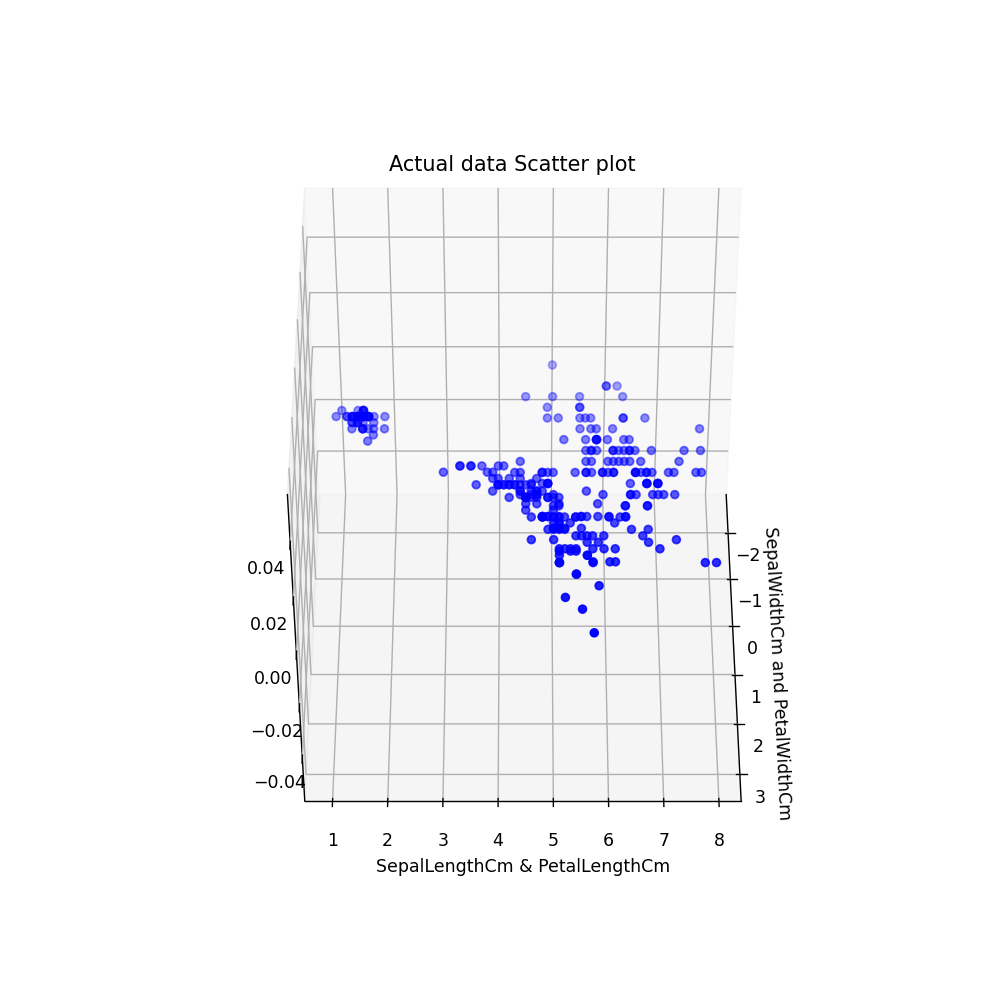

In [22]:
# to plot scatter plot transforming our original X matrix to X_plot
X_plot = np.hstack((x0, x1))

# our scatter plot in 3d
%matplotlib notebook
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
   
ax.scatter(X_plot, Y, color='blue')
ax.set_xlabel('SepalWidthCm and PetalWidthCm')
ax.set_ylabel('SepalLengthCm & PetalLengthCm')
plt.title('Actual data Scatter plot')
ax.view_init(45, 0)
plt.show()

<IPython.core.display.Javascript object>


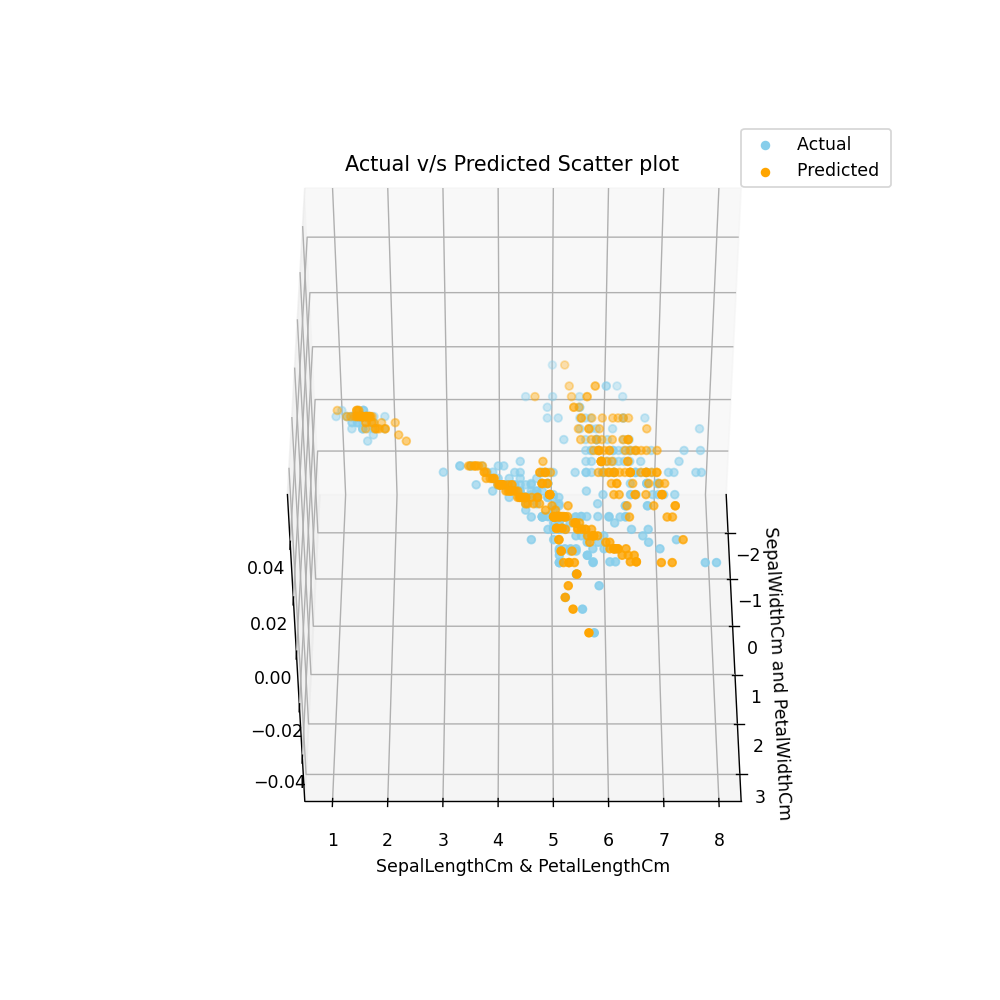

In [23]:
# to plot scatter plot transforming our original X matrix to X_plot
X_plot = np.hstack((x0, x1))
# our scatter plot in 3d
%matplotlib notebook
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
   
ax.scatter(X_plot, Y, color='skyblue',label ='Actual ' )
ax.scatter(X_plot, Y_pred, c ='orange',label ='Predicted ')
ax.set_xlabel('SepalWidthCm and PetalWidthCm')
ax.set_ylabel('SepalLengthCm & PetalLengthCm')
plt.title('Actual v/s Predicted Scatter plot')
ax.legend()
ax.view_init(45, 0)
plt.show()

In [26]:
# np.max(z)/7400
# xs = np.tile(np.arange(2),(2,1))
# ys = np.tile(np.arange(2),(2,1)).T
# z = 
# # 3*2
# %matplotlib notebook
# xs, ys = np.meshgrid(range(1,2), range(1,4))
# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X_plot, Y, color='skyblue',label ='Actual cement', alpha = 0.1 )
# ax.scatter(X_plot, Y_pred, c ='orange',label ='Predicted cement',alpha =0.1)
# ax.plot_surface(xs, ys, z,alpha = 1)
# ax.set_xlabel('SepalWidthCm and PetalWidthCm')
# ax.set_ylabel('SepalLengthCm & PetalLengthCm')
# plt.title('Fitted plot plane ')
# ax.legend()
# ax.view_init(45, 0)
# plt.show()

In [27]:
# calculting R-square value
numerator = 0.0
denomenator = 0.0

Y_mean = np.mean(Y)

for i in range(Y.shape[0]):
    numerator = numerator + ((Y_pred[i] - Y_mean)**2)
    denomenator = denomenator + ((Y[i] - Y_mean)**2)

R_square = (numerator/denomenator)
print('R-square value is : ', R_square)  

R-square value is :  [0.88713649 0.95096533]


In [28]:
#anova attributes
# J matrix of one for computation of ss-regression , ss-residual, ss-total
n = X.shape[0]
J = np.ones([n, n])
value = J/n

In [29]:
#ss-regression = Y.T*(H-(1/n)J)Y
Y_transpose = Y.T
ss_regression = Y_transpose.dot(hat_matrix - value).dot(Y)
print(ss_regression)

[[ 72.24402454 167.92306181]
 [167.92306181 433.1272058 ]]


In [30]:
# ss-residual = Y.T(I - H)Y
i_matrix = np.identity(X.shape[0])
ss_residual = Y_transpose.dot(i_matrix - hat_matrix).dot(Y)
print(ss_residual)

[[29.92430879 21.85560485]
 [21.85560485 30.73652754]]


In [31]:
# ss-total = Y.T(I-(1/n)J)Y
ss_total = Y_transpose.dot(i_matrix - value).dot(Y)
print(ss_total)

[[102.16833333 189.77866667]
 [189.77866667 463.86373333]]


In [32]:
n = Y.shape[0]
m = Y.shape[1]
k = X.shape[1]
ms_regression = (ss_regression/m*(n-1))
ms_residual = (ss_residual/m*(n-k))
print("MS Regression :\n\n", ms_regression, "\n\nMS Residual :\n\n", ms_residual)

MS Regression :

 [[ 5382.17982827 12510.26810516]
 [12510.26810516 32267.97683196]] 

MS Residual :

 [[2199.43669628 1606.38695665]
 [1606.38695665 2259.13477384]]


In [33]:
F_stats = (ms_regression/ms_residual)
print("F-stats for data : \n", F_stats)
std_Error = (ms_residual**0.5) 
print("\nStandared Error :\n", std_Error)

F-stats for data : 
 [[ 2.44707194  7.78782973]
 [ 7.78782973 14.28333414]]

Standared Error :
 [[46.89815238 40.07975744]
 [40.07975744 47.53035634]]
